In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [74]:
df = pd.read_csv('glass.data', header = None, names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])

# Wyświetlenie wczytanych danych
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


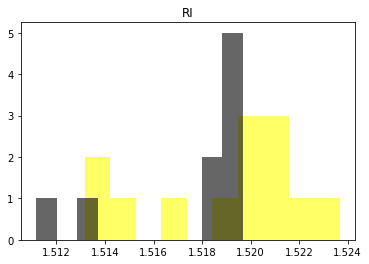

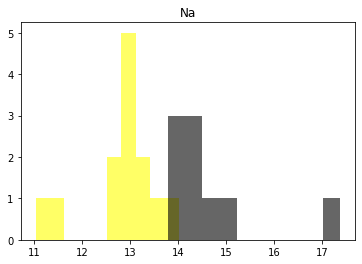

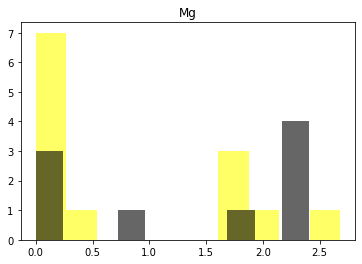

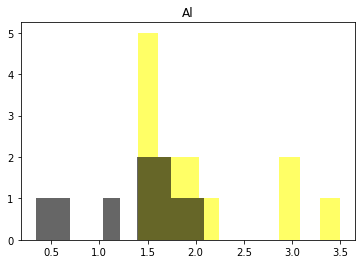

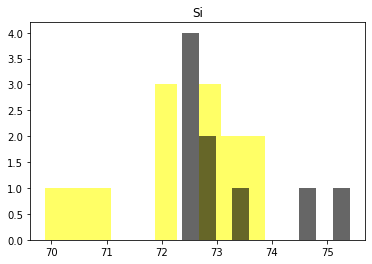

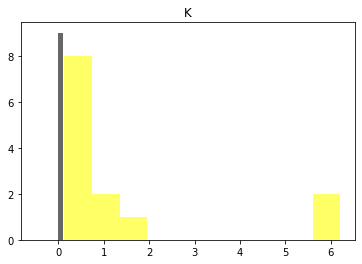

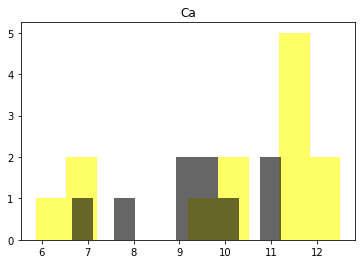

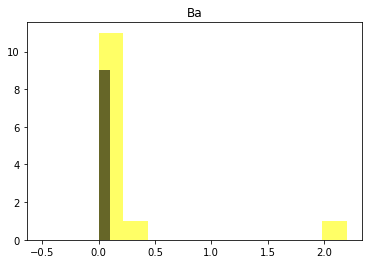

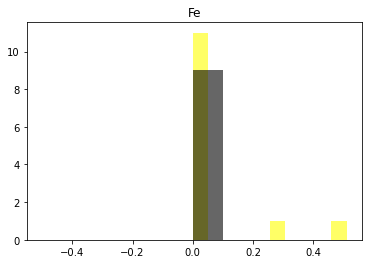

In [143]:
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
Y = df['Type of glass']

for label in X:
#     plt.hist(df[df['Type of glass'] == 1][label], color = 'blue', alpha = 0.6)
#     plt.hist(df[df['Type of glass'] == 2][label], color = 'red', alpha = 0.6)
#     plt.hist(df[df['Type of glass'] == 3][label], color = 'green', alpha = 0.6)
    plt.hist(df[df['Type of glass'] == 5][label], color = 'yellow', alpha = 0.6)
    plt.hist(df[df['Type of glass'] == 6][label], color = 'black', alpha = 0.6)
#     plt.hist(df[df['Type of glass'] == 7][label], color = 'brown', alpha = 0.6)
    plt.title(label)
    plt.show()

In [197]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

pipe1 = Pipeline([('normalizer', Normalizer()), ('classifier', DecisionTreeClassifier())])
predictions1 = pipe1.fit(x_train, y_train).predict(x_test)
print(predictions1)

pipe2 = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
predictions2 = pipe2.fit(x_train, y_train).predict(x_test)
print(predictions2)

pipe3 = Pipeline([('classifier', DecisionTreeClassifier())])
predictions3 = pipe3.fit(x_train, y_train).predict(x_test)
print(predictions3)


# Tworzenie dataframe'a na podstawie tablicy transponowanej
df2 = pd.DataFrame([predictions1, predictions2, predictions3])
df2



[1 1 2 1 2 2 6 7 1 1 2 2 2 7 2 1 3 6 6 2 1 1 3 3 3 5 7 6 5 2 1 1 7 2 7 5 2
 3 1 1 2 2 1]
[1 1 3 3 2 2 3 7 1 1 1 2 2 7 1 2 1 2 3 1 2 1 1 3 2 5 7 3 5 2 1 1 7 3 7 5 2
 3 1 3 2 2 1]
[1 1 1 1 2 2 2 7 1 1 1 2 2 7 1 2 1 2 3 1 2 1 1 6 2 5 7 6 5 2 1 1 5 3 7 5 2
 3 1 3 2 2 1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1,1,2,1,2,2,6,7,1,1,2,2,2,7,2,1,3,6,6,2,1,1,3,3,3,5,7,6,5,2,1,1,7,2,7,5,2,3,1,1,2,2,1
1,1,1,3,3,2,2,3,7,1,1,1,2,2,7,1,2,1,2,3,1,2,1,1,3,2,5,7,3,5,2,1,1,7,3,7,5,2,3,1,3,2,2,1
2,1,1,1,1,2,2,2,7,1,1,1,2,2,7,1,2,1,2,3,1,2,1,1,6,2,5,7,6,5,2,1,1,5,3,7,5,2,3,1,3,2,2,1


In [198]:
a_score1 = accuracy_score(y_test, predictions1)
print("accuracy score 1:" , a_score1)
r_score1 = recall_score(y_test, predictions1, average = None)
print("recall score 1:", r_score1, '\n')

a_score2 = accuracy_score(y_test, predictions2)
print("accuracy score 2:" , a_score2)
r_score2 = recall_score(y_test, predictions2, average = None)
print("recall score 2:" , r_score2, '\n')

a_score3 = accuracy_score(y_test, predictions3)
print("accuracy score 3:" , a_score3)
r_score3 = recall_score(y_test, predictions3, average = None)
print("recall score 3:" , r_score3)

accuracy score 1: 0.7209302325581395
recall score 1: [0.64285714 0.625      1.         1.         0.75       1.        ] 

accuracy score 2: 0.627906976744186
recall score 2: [0.78571429 0.5        0.5        1.         0.         1.        ] 

accuracy score 3: 0.6511627906976745
recall score 3: [0.78571429 0.5625     0.5        1.         0.25       0.75      ]


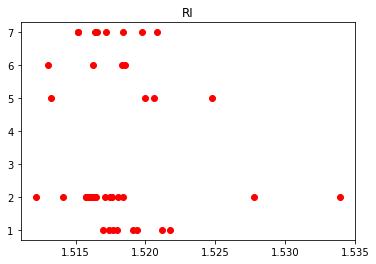

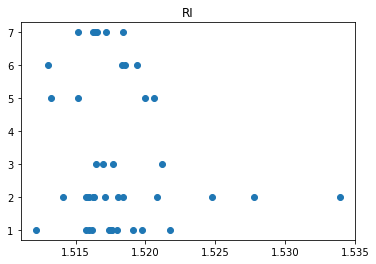

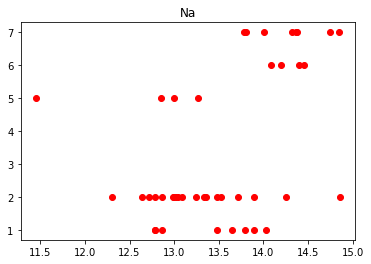

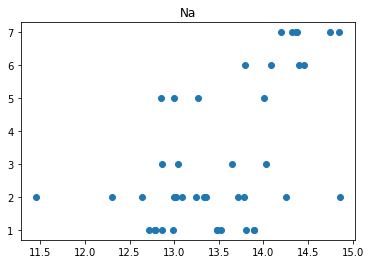

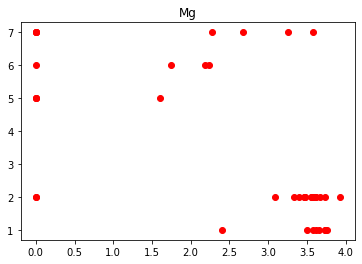

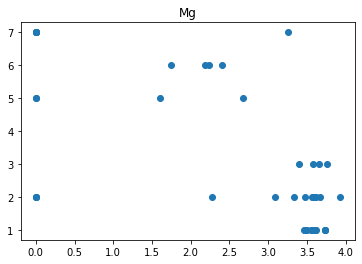

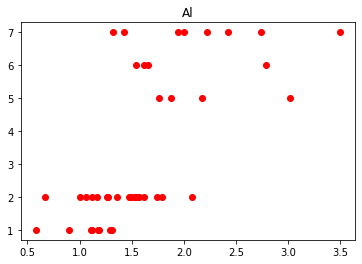

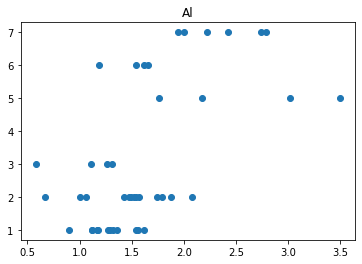

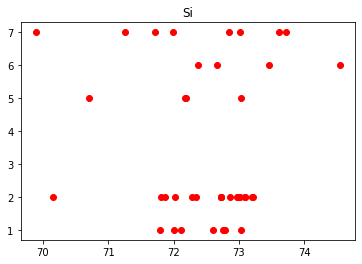

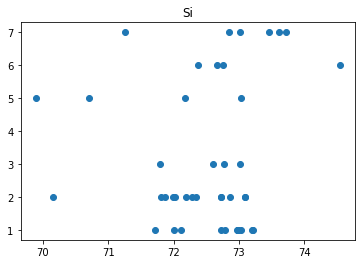

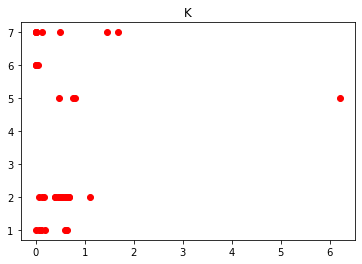

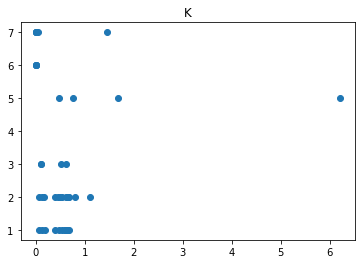

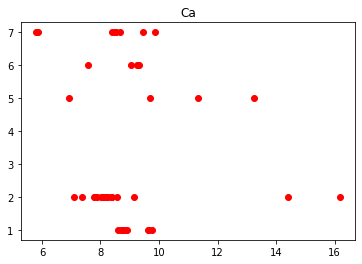

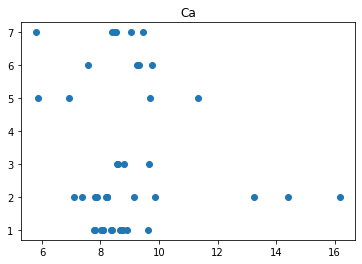

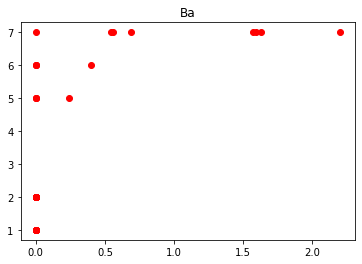

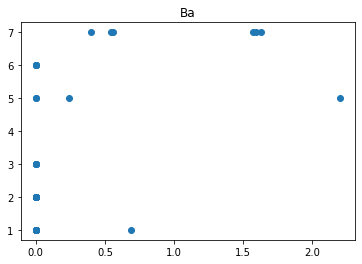

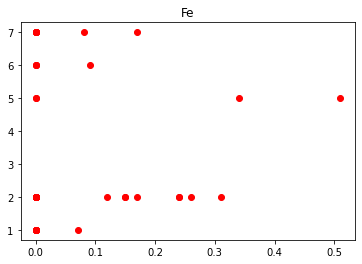

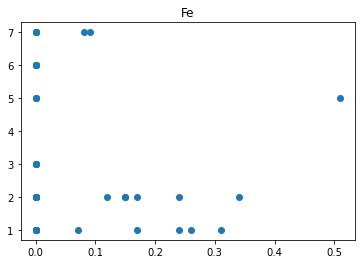

In [34]:
#porownanie predykcji1 do y_test
for label in x_test:
    plt.scatter(x_test[label], predictions1, c = 'red')
    plt.title(label)
    plt.show()
    plt.scatter(x_test[label], y_test)
    plt.title(label)
    plt.show()
    

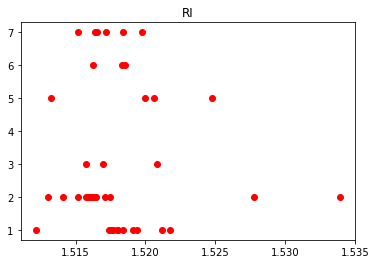

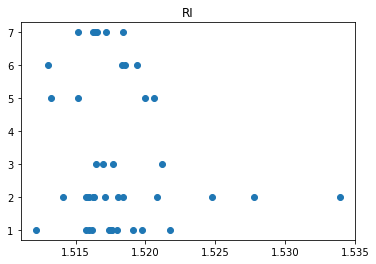

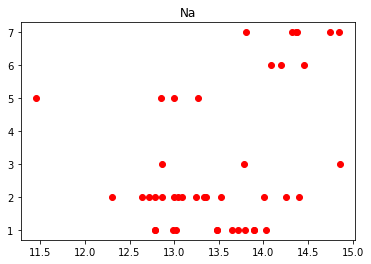

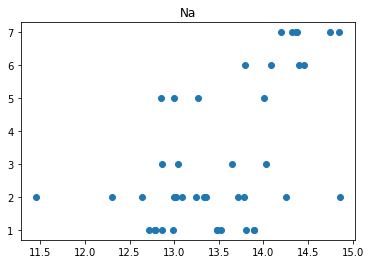

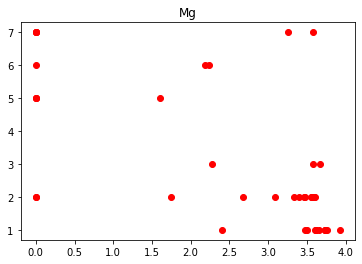

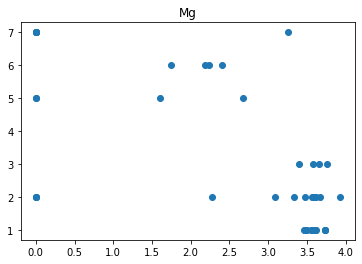

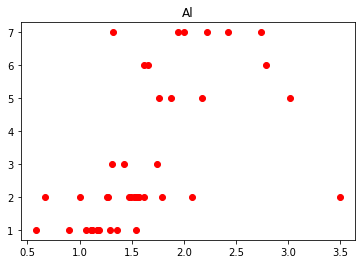

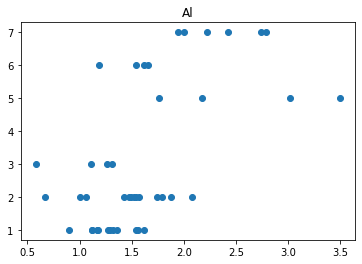

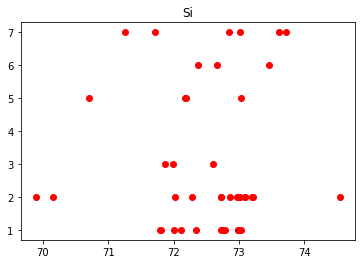

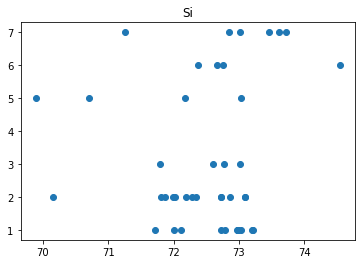

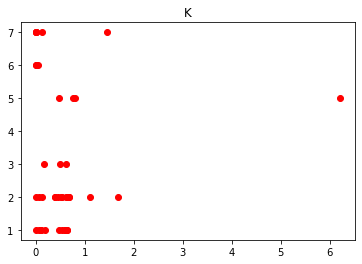

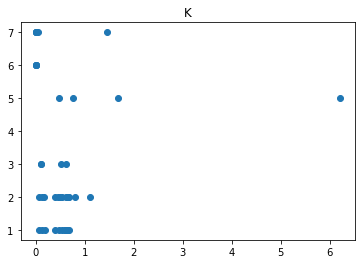

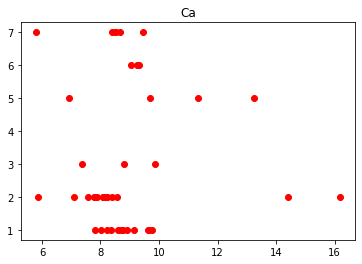

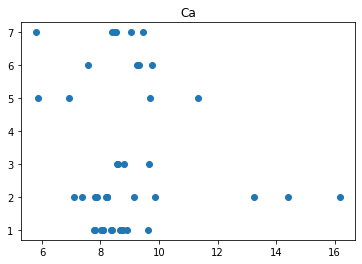

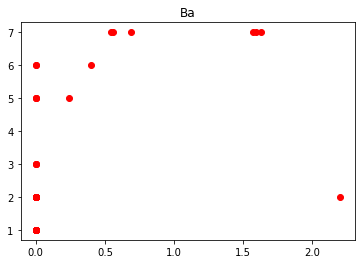

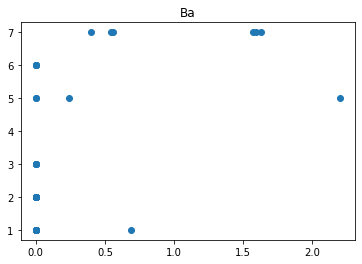

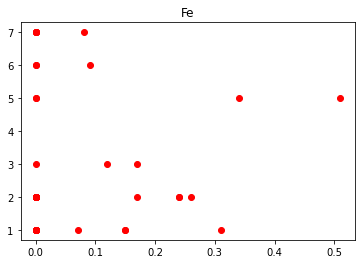

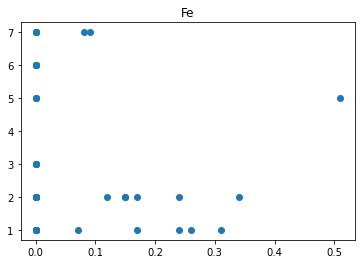

In [35]:
for label in x_test:
    plt.scatter(x_test[label], predictions2, c = 'red')
    plt.title(label)
    plt.show()
    plt.scatter(x_test[label], y_test)
    plt.title(label)
    plt.show()

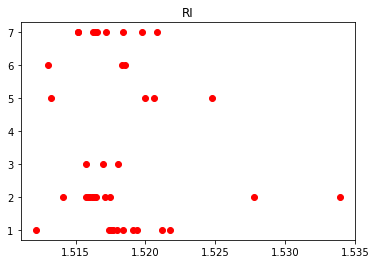

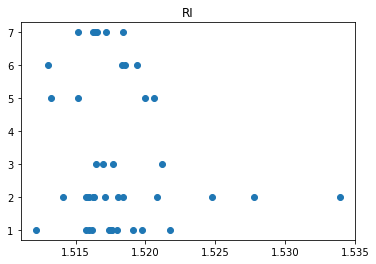

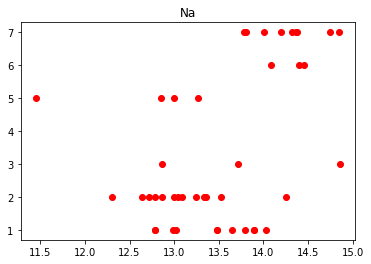

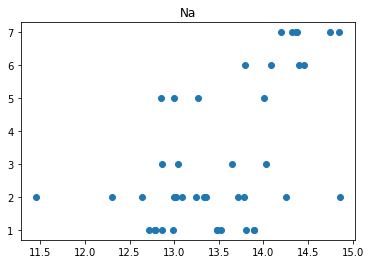

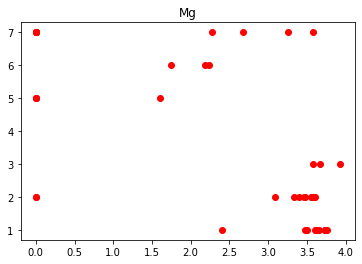

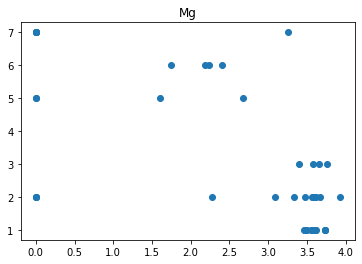

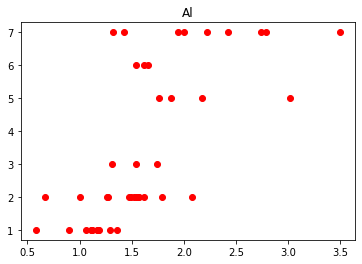

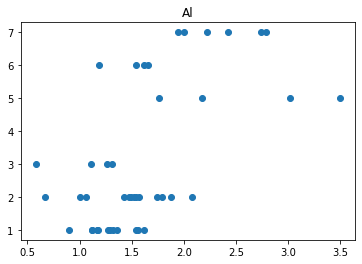

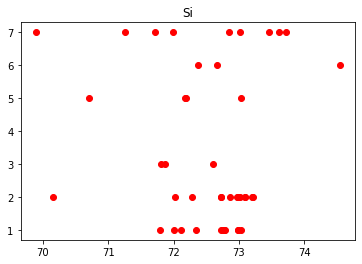

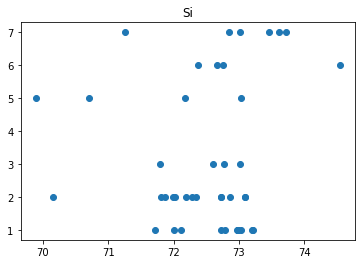

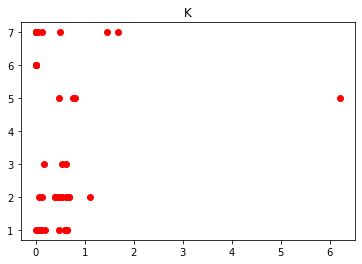

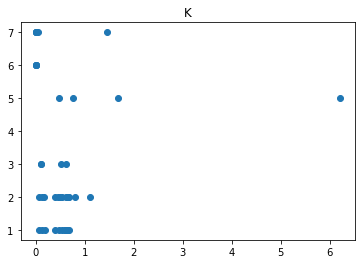

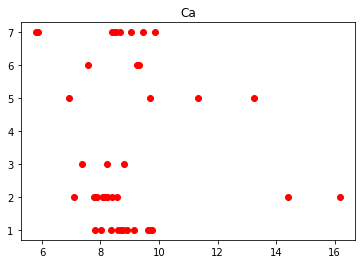

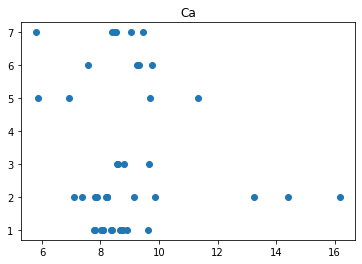

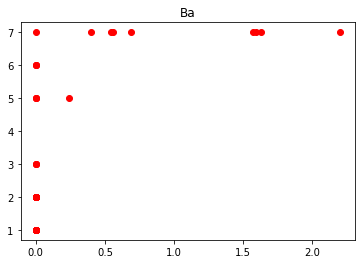

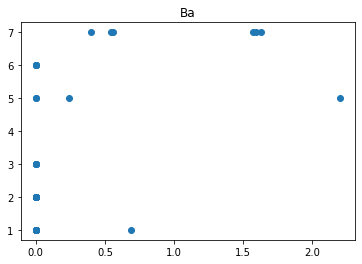

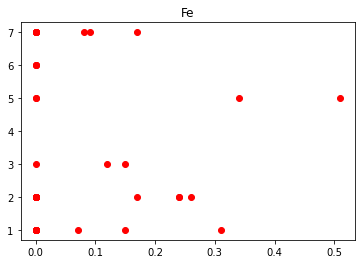

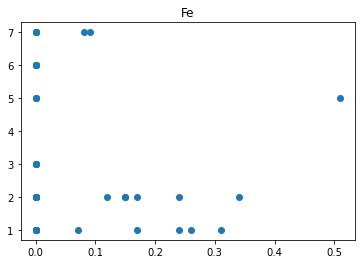

In [36]:
for label in x_test:
    plt.scatter(x_test[label], predictions3, c = 'red')
    plt.title(label)
    plt.show()
    plt.scatter(x_test[label], y_test)
    plt.title(label)
    plt.show()

In [226]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

pipe1 = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
predictions_decision_tree1 = pipe1.fit(x_train, y_train).predict(x_test)
print("decision tree1:", predictions_decision_tree1)

pipe2 = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier(max_depth=3, splitter='random'))])
predictions_decision_tree2 = pipe2.fit(x_train, y_train).predict(x_test)
print("decision tree1:", predictions_decision_tree2)

pipe3 = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier(min_samples_split=3, criterion='entropy'))])
predictions_decision_tree3 = pipe3.fit(x_train, y_train).predict(x_test)
print("decision tree1:", predictions_decision_tree3)


# Tworzenie dataframe'a na podstawie tablicy transponowanej
df3 = pd.DataFrame([predictions_decision_tree1, predictions_decision_tree2, predictions_decision_tree3])

df3

decision tree1: [1 1 1 2 2 2 1 1 1 7 2 5 1 2 1 2 1 2 7 6 7 3 1 6 6 1 2 1 1 3 1 2 2 5 2 1 1
 3 7 1 2 1 2]
decision tree1: [2 2 2 7 1 1 2 1 2 7 2 7 2 2 2 2 2 2 2 2 7 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 7 2 2 2 2]
decision tree1: [1 1 1 6 2 1 1 1 3 7 2 5 1 2 1 2 1 2 2 2 7 3 2 1 6 1 1 1 1 1 3 2 2 5 1 1 1
 3 7 1 1 1 2]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1,1,1,2,2,2,1,1,1,7,2,5,1,2,1,2,1,2,7,6,7,3,1,6,6,1,2,1,1,3,1,2,2,5,2,1,1,3,7,1,2,1,2
1,2,2,2,7,1,1,2,1,2,7,2,7,2,2,2,2,2,2,2,2,7,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7,2,2,2,2
2,1,1,1,6,2,1,1,1,3,7,2,5,1,2,1,2,1,2,2,2,7,3,2,1,6,1,1,1,1,1,3,2,2,5,1,1,1,3,7,1,1,1,2


In [227]:
a_score1 = accuracy_score(y_test, predictions_decision_tree1)
print("accuracy score 1:" , a_score1)
r_score1 = recall_score(y_test, predictions_decision_tree1, average = None)
print("recall score 1:", r_score1, '\n')

a_score2 = accuracy_score(y_test, predictions_decision_tree2)
print("accuracy score 2:" , a_score2)
r_score2 = recall_score(y_test, predictions_decision_tree2, average = None)
print("recall score 2:" , r_score2, '\n')

a_score3 = accuracy_score(y_test, predictions_decision_tree3)
print("accuracy score 3:" , a_score3)
r_score3 = recall_score(y_test, predictions_decision_tree3, average = None)
print("recall score 3:" , r_score3)

accuracy score 1: 0.6976744186046512
recall score 1: [0.83333333 0.58333333 0.33333333 0.66666667 0.5        0.8       ] 

accuracy score 2: 0.3488372093023256
recall score 2: [0.11111111 0.83333333 0.         0.         0.         0.6       ] 

accuracy score 3: 0.6511627906976745
recall score 3: [0.77777778 0.5        0.33333333 0.66666667 1.         0.6       ]


In [250]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

pipe1 = Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())])
predictions_bayes1 = pipe1.fit(x_train, y_train).predict(x_test)
print("bayes1:", predictions_bayes1)

pipe2 = Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB(var_smoothing=3.0))])
predictions_bayes2 = pipe2.fit(x_train, y_train).predict(x_test)
print("bayes2:", predictions_bayes2)

pipe3 = Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB(priors=[0.32, 0.36, 0.08, 0.06, 0.04, 0.14]))])
predictions_bayes3 = pipe3.fit(x_train, y_train).predict(x_test)
print("bayes3:",predictions_bayes3)


# Tworzenie dataframe'a na podstawie tablicy transponowanej
df4 = pd.DataFrame([predictions_bayes1, predictions_bayes2, predictions_bayes3])

df4

bayes1: [5 3 2 5 3 7 3 1 2 6 7 5 3 2 3 3 2 1 1 3 3 7 1 5 7 3 2 2 1 3 3 3 3 7 3 3 5
 3 3 3 3 3 1]
bayes2: [5 2 1 1 1 7 1 1 2 1 7 2 1 1 1 1 1 1 1 1 1 7 1 2 2 1 1 1 1 1 1 1 1 7 1 1 2
 1 1 1 1 1 1]
bayes3: [5 3 2 5 3 7 3 1 2 6 7 5 3 2 3 3 2 1 1 3 3 7 1 5 7 3 2 2 1 3 3 3 3 7 3 3 5
 3 3 3 3 3 1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,5,3,2,5,3,7,3,1,2,6,7,5,3,2,3,3,2,1,1,3,3,7,1,5,7,3,2,2,1,3,3,3,3,7,3,3,5,3,3,3,3,3,1
1,5,2,1,1,1,7,1,1,2,1,7,2,1,1,1,1,1,1,1,1,1,7,1,2,2,1,1,1,1,1,1,1,1,7,1,1,2,1,1,1,1,1,1
2,5,3,2,5,3,7,3,1,2,6,7,5,3,2,3,3,2,1,1,3,3,7,1,5,7,3,2,2,1,3,3,3,3,7,3,3,5,3,3,3,3,3,1


In [251]:
a_score1 = accuracy_score(y_test, predictions_bayes1)
print("accuracy score 1:" , a_score1)
r_score1 = recall_score(y_test, predictions_bayes1, average = None)
print("recall score 1:", r_score1, '\n')

a_score2 = accuracy_score(y_test, predictions_bayes2)
print("accuracy score 2:" , a_score2)
r_score2 = recall_score(y_test, predictions_bayes2, average = None)
print("recall score 2:" , r_score2, '\n')

a_score3 = accuracy_score(y_test, predictions_bayes3)
print("accuracy score 3:" , a_score3)
r_score3 = recall_score(y_test, predictions_bayes3, average = None)
print("recall score 3:" , r_score3)

accuracy score 1: 0.20930232558139536
recall score 1: [0.11111111 0.26666667 0.         0.66666667 0.         0.5       ] 

accuracy score 2: 0.5116279069767442
recall score 2: [0.94444444 0.2        0.         0.33333333 0.         0.5       ] 

accuracy score 3: 0.20930232558139536
recall score 3: [0.11111111 0.26666667 0.         0.66666667 0.         0.5       ]
